In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MEDIQA-CORR-2024-MS-TrainingData.csv to MEDIQA-CORR-2024-MS-TrainingData.csv


In [ ]:
df = pd.read_csv('MEDIQA-CORR-2024-MS-TrainingData.csv', delimiter=',', encoding='utf-8')
df= df.drop(['Error Sentence ID', 'Error Sentence', 'Corrected Sentence', 'Corrected Text'], axis=1)
df.head()

,Unnamed: 0,Text ID,Text,Sentences,Error Flag
0,0,ms-train-0,A 53-year-old man comes to the physician becau...,0 A 53-year-old man comes to the physician bec...,1
1,1,ms-train-1,A 53-year-old man comes to the physician becau...,0 A 53-year-old man comes to the physician bec...,0
2,2,ms-train-2,A 9-year-old girl is brought to the pediatrici...,0 A 9-year-old girl is brought to the pediatri...,1
3,3,ms-train-3,A 9-year-old girl is brought to the pediatrici...,0 A 9-year-old girl is brought to the pediatri...,0
4,4,ms-train-4,Blood cultures are sent to the laboratory. Int...,0 Blood cultures are sent to the laboratory.\n...,1


In [ ]:
# Analizamos las primeras 5 columnas para obtener sus tipos de datos y otras características
column_info = df.dtypes

# Analizamos los nombres de las columnas para identificar las primeras 5
column_names = df.columns[:5]

# Extraemos ejemplos de datos de las primeras 5 columnas para entender mejor su contenido
sample_data = df.head()

column_info[:5], column_names, sample_data

(Unnamed: 0     int64
 Text ID       object
 Text          object
 Sentences     object
 Error Flag     int64
 dtype: object,
 Index(['Unnamed: 0', 'Text ID', 'Text', 'Sentences', 'Error Flag'], dtype='object'),
    Unnamed: 0     Text ID                                               Text  \
 0           0  ms-train-0  A 53-year-old man comes to the physician becau...   
 1           1  ms-train-1  A 53-year-old man comes to the physician becau...   
 2           2  ms-train-2  A 9-year-old girl is brought to the pediatrici...   
 3           3  ms-train-3  A 9-year-old girl is brought to the pediatrici...   
 4           4  ms-train-4  Blood cultures are sent to the laboratory. Int...   
 
                                            Sentences  Error Flag  
 0  0 A 53-year-old man comes to the physician bec...           1  
 1  0 A 53-year-old man comes to the physician bec...           0  
 2  0 A 9-year-old girl is brought to the pediatri...           1  
 3  0 A 9-year-old girl is b

In [ ]:
# Revisar los valores nulos
df.replace('', np.nan, inplace=True)

# Lista de columnas a revisar
columns_to_check = ['Unnamed: 0', 'Text ID', 'Text', 'Sentences', 'Error Flag']

#  Iterar sobre cada columna y contar los valores nulos
for column in columns_to_check:
    # Contar los valores nulos en la columna
    missing_count = df[column].isnull().sum()
    print(f'Número de datos faltantes en {column}: {missing_count}')


Número de datos faltantes en Unnamed: 0: 0
Número de datos faltantes en Text ID: 0
Número de datos faltantes en Text: 0
Número de datos faltantes en Sentences: 0
Número de datos faltantes en Error Flag: 0


In [ ]:
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

In [ ]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "â€\x9d": " ",
    ".â€\x9d": ".",
    "â€“": "-",
    "â€œsomething": "something",
    "patientâ€™s": "patients",
    "â‰¥": "≥",
    "\n": ",",
    "â€œ": "",
    "Waldenstromâ€™s": "Waldenströms",
    "Âµmol/L": "µmol/L",
    "â€œmemory": "memory",
    "weeksâ€™": "weeks",
    "74 Î¼m3": "74 μm^3",
    "ÂµIU/L": "µIU/L",
    "â‰¤": "≤",
    "Clâˆ’": "Cl-",
    "physicianâ€™s": "physicians",
    "ÂºF": "ºF",
    "âˆ’": "-",
    "Â½": "½",
    "Î¼g/dL": "μg/dL",
    "pediatricianâ€™s": "pediatricians",
    "yearsâ€™": "years",
    "Âµg": "µg",
    "â€": "",
    "Kennedyâ€™s": "Kennedys",
    "Kennedy™s": "Kennedys",
    "can™t": "can't",
    "Î²": "β",
    "Ã—": "x",
    "ÃŸ-hCG": "β-hCG",
    "SÃ©quard": "Séquard",
    "Î³": "γ",
    "Î¼m3": "μm^3",
    "Î±": "α",
    "Î¼U/mL": "μU/mL",
    "Î¼": "μ",
    "'": "",
    "\"":"" #Este lo dejo a consideracion, dependiendo si les funciona o no
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    df['Text'] = df['Text'].str.replace(old, new, regex=False)

# Verificar el reemplazo
df['Text'].head()


0    A 53-year-old man comes to the physician becau...
1    A 53-year-old man comes to the physician becau...
2    A 9-year-old girl is brought to the pediatrici...
3    A 9-year-old girl is brought to the pediatrici...
4    Blood cultures are sent to the laboratory. Int...
Name: Text, dtype: object

In [ ]:
import pandas as pd
import re

# Función para aplicar todas las transformaciones no regex en una sola pasada
def optimize_text(text):
    # Aplicar transformaciones no regex
    text = text.strip().replace("Cl- ", "Cl ").replace("'", "").replace("’", "")
    text = text.replace(":,", ":").replace(',_', ',').replace('[', '').replace(']', '')
    text = text.replace(';', ',').replace('.,', '.').replace('mg dl', 'mg/dl')
    text = text.replace('é', 'e').replace('patient s', 'patients').replace('girl s', 'girls')
    text = text.replace('gilbert s', 'gilberts').replace(".'", ".").replace(",'", ",")
    text = text.replace("',", ",").lower()  # Convertir a minúsculas aquí para optimizar
    return text

# Aplicar optimizaciones no regex
df['Text'] = df['Text'].apply(optimize_text)

# Aplicar optimizaciones con regex
df['Text'] = df['Text'].str.replace(r',,', ',', regex=True)
df['Text'] = df['Text'].str.replace(r'  +', ' ', regex=True)
df['Text'] = df['Text'].str.replace('mm hg', 'mmHg', flags=re.IGNORECASE, regex=True)


In [ ]:
# Estadísticas para 'Unnamed: 0' (siendo numérica, pero solo representa un índice)
unnamed_stats = df['Unnamed: 0'].describe()
unnamed_stats

count    2189.000000
mean     1094.000000
std       632.054191
min         0.000000
25%       547.000000
50%      1094.000000
75%      1641.000000
max      2188.000000
Name: Unnamed: 0, dtype: float64

In [ ]:
# Estadísticas para 'Text ID' (resumen categórico)
text_id_stats = df['Text ID'].describe()
text_id_stats


count           2189
unique          2189
top       ms-train-0
freq               1
Name: Text ID, dtype: object

In [ ]:
# Estadísticas para 'Text' (resumen categórico)
text_stats = df['Text'].describe()

text_stats


count                                                  2189
unique                                                 2189
top       a 53-year-old man comes to the physician becau...
freq                                                      1
Name: Text, dtype: object

In [ ]:
# Estadísticas para 'Sentences' (resumen categórico)
sentences_stats = df['Sentences'].describe()

sentences_stats

count                                                  2189
unique                                                 2189
top       0 A 53-year-old man comes to the physician bec...
freq                                                      1
Name: Sentences, dtype: object

Model

In [ ]:
pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

texts = df['Text'].values
labels = df['Error Flag'].values

# Preprocesamiento de texto
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf_vectorizer.fit_transform(texts)

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Definir los modelos base con los mejores parámetros encontrados
lr_best = LogisticRegression(C=0.1, max_iter=1000)
dt_best = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)
svc_best = SVC(C=0.1, kernel='linear', probability=True)

base_learners_best = [
    ('lr_best', lr_best),
    ('dt_best', dt_best),
    ('svc_best', svc_best)
]

# Estimador final con los parámetros especificados
final_estimator_best = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0, warm_start=False)

# Crear el modelo de Stacking con los mejores estimadores
stack_model_best = StackingClassifier(estimators=base_learners_best, final_estimator=final_estimator_best, cv=5)

# Entrenar el modelo de Stacking con el conjunto de entrenamiento
stack_model_best.fit(X_train, y_train)

# Evaluar el modelo de Stacking en el conjunto de prueba
y_pred_best = stack_model_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
precision_best = precision_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy of Optimized Stacking Model: {accuracy_best}")
print(f"F1 Score of Optimized Stacking Model: {f1_best}")
print(f"Recall of Optimized Stacking Model: {recall_best}")
print(f"Precision of Optimized Stacking Model: {precision_best}")


Accuracy of Optimized Stacking Model: 0.7511415525114156
F1 Score of Optimized Stacking Model: 0.7514727248070104
Recall of Optimized Stacking Model: 0.7511415525114156
Precision of Optimized Stacking Model: 0.7540662690750665


In [ ]:
# Predicciones en el conjunto de entrenamiento para calcular métricas
y_train_pred = stack_model_best.predict(X_train)

# Calculando métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
precision_train = precision_score(y_train, y_train_pred, average='weighted')

# Mostrar métricas para el conjunto de entrenamiento
print("Training Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"F1 Score: {f1_train}")
print(f"Recall: {recall_train}")
print(f"Precision: {precision_train}")

# Mostrar métricas para el conjunto de prueba
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_best}")
print(f"F1 Score: {f1_best}")
print(f"Recall: {recall_best}")
print(f"Precision: {precision_best}")


Training Metrics:
Accuracy: 0.35979440319817246
F1 Score: 0.36096616014779936
Recall: 0.35979440319817246
Precision: 0.3704299388964377

Test Metrics:
Accuracy: 0.7511415525114156
F1 Score: 0.7514727248070104
Recall: 0.7511415525114156
Precision: 0.7540662690750665


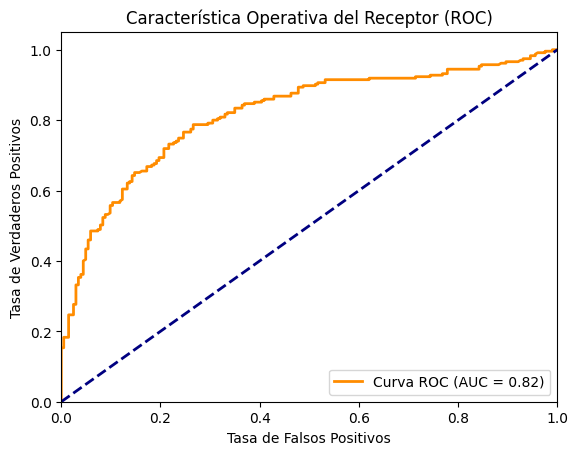

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Asegurarte de que tu modelo final (SVC) está configurado para devolver probabilidades
# Obtener las probabilidades de la clase positiva
y_proba = stack_model_best.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR, y umbrales para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_proba)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib

# Especificar la ruta y el nombre de archivo para guardar el modelo de Stacking y el vectorizador TF-IDF
model_filename = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Stacking_3/stack_model_best.joblib'
vectorizer_filename = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Stacking_3/tfidf_vectorizer_best.joblib'

# Guardar el modelo de Stacking
joblib.dump(stack_model_best, model_filename)

# Guardar el vectorizador TF-IDF
joblib.dump(tfidf_vectorizer, vectorizer_filename)


['/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/Stacking_3/tfidf_vectorizer_best.joblib']